In [5]:
from qiskit import QuantumCircuit
import numpy as np

In [16]:
# Creating the circuit for general phase oracle

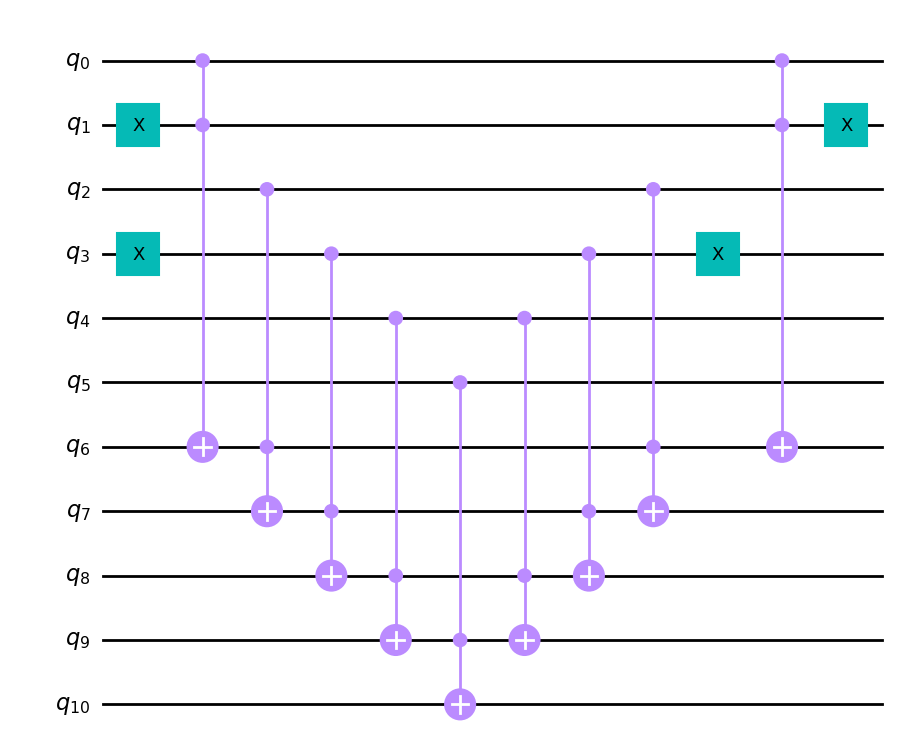

In [26]:
n = 6 # no. of working qubits (= no. of bits in "w")
# no. of auxiliary and ancilla qubits = n-1
q = 2 * n - 1 # no. of total qubits needed
w = '110101' # index string of the element we want to find
# Replace the input "w" for different phase oracles

qc = QuantumCircuit(q)

# Putting X-gates on working qubits with corresponding "w"-value = 0
i = n-1
for bit in w:
    if bit == '0':
        qc.x(i)
    i-=1

# Putting CX-gates
qc.ccx(0,1,n)
for i in range(n-2):
    qc.ccx(i+2,n+i,n+i+1)

# Putting CX-gates in reverse
i = n-2
while i > 1:
    qc.ccx(i,n+i-2,n+i-1)
    i-=1
qc.ccx(0,1,n)

# Putting X-gates on working qubits again
i = n-1
for bit in w:
    if bit == '0':
        qc.x(i)
    i-=1

qc.draw()

In [18]:
# We use the above circuit construction to define our general Phase Oracle

In [30]:
# Define general phase oracle (marks "w")

n = 6 # no. of working qubits (= no. of bits in "w")
q = 2 * n - 1 # no. of total qubits needed
w = '110101' # index string of the element we want to find
# Replace the input "w" for different phase oracles

def gen_phase_oracle(q,name = 'Uf'):
    qc = QuantumCircuit(q, name=name)
    
    # Copy code for the circuit constructed above
    i = n-1
    for bit in w:
        if bit == '0':
            qc.x(i)
        i-=1
    qc.ccx(0,1,n)
    for i in range(n-2):
        qc.ccx(i+2,n+i,n+i+1)
    i = n-2
    while i > 1:
        qc.ccx(i,n+i-2,n+i-1)
        i-=1
    qc.ccx(0,1,n)
    i = n-1
    for bit in w:
        if bit == '0':
            qc.x(i)
        i-=1
    return qc

In [20]:
# Creating the circuit for general diffusion operator

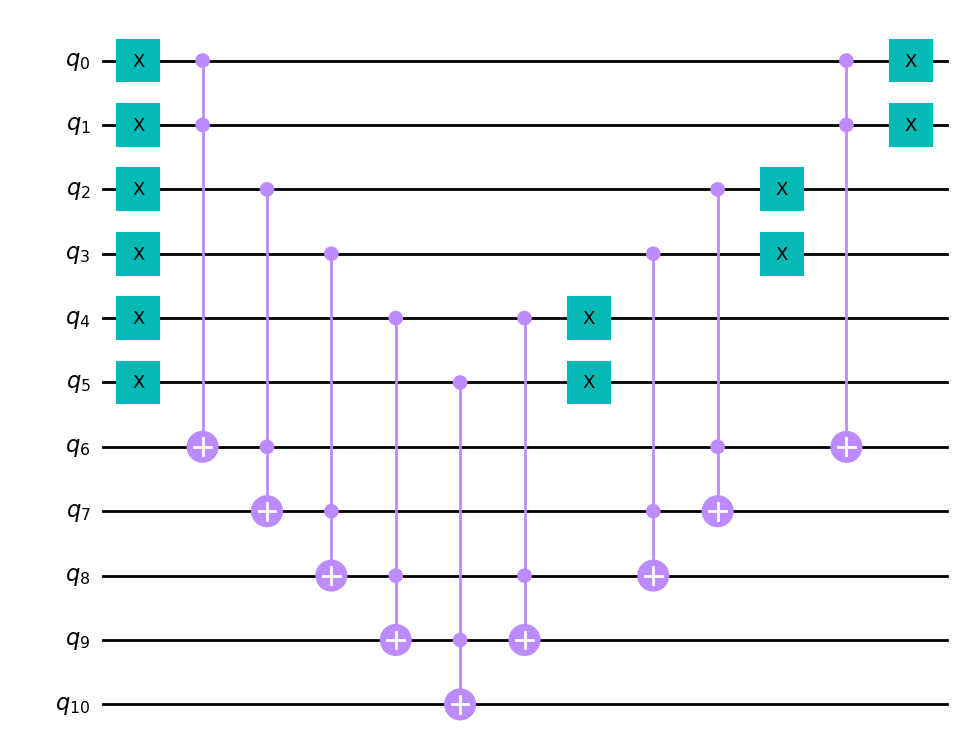

In [31]:
n = 6 # no. of working qubits (= no. of bits in "w")
# no. of auxiliary and ancilla qubits = n-1
q = 2 * n - 1 # no. of total qubits needed

qc = QuantumCircuit(q)

# Putting X-gates on all working qubits
for i in range(n):
    qc.x(i)

# Putting CX-gates
qc.ccx(0,1,n)
for i in range(n-2):
    qc.ccx(i+2,n+i,n+i+1)

# Putting CX-gates in reverse
i = n-2
while i > 1:
    qc.ccx(i,n+i-2,n+i-1)
    i-=1
qc.ccx(0,1,n)

# Putting X-gates on all working qubits again
for i in range(n):
    qc.x(i)

qc.draw()

In [ ]:
# We use the above circuit construction to define our general Diffusor

In [33]:
# Define general diffuser (marks "all-zero" state |00....0>)

n = 6 # no. of working qubits (= no. of bits in "w")
q = 2 * n - 1 # no. of total qubits needed

def gen_diffuser(q, name='V'):
    qc = QuantumCircuit(q, name=name)
    
    for i in range(n): # first layer of Hadamards in diffuser
        qc.h(i)
    
    # Copy code for the circuit constructed above    
    for i in range(n):
        qc.x(i)
    qc.ccx(0,1,n)
    for i in range(n-2):
        qc.ccx(i+2,n+i,n+i+1)
    i = n-2
    while i > 1:
        qc.ccx(i,n+i-2,n+i-1)
        i-=1
    qc.ccx(0,1,n)
    for i in range(n):
        qc.x(i)
    
    for i in range(n): # second layer of Hadamards in diffuser
        qc.h(i)    
    return qc

r =  6


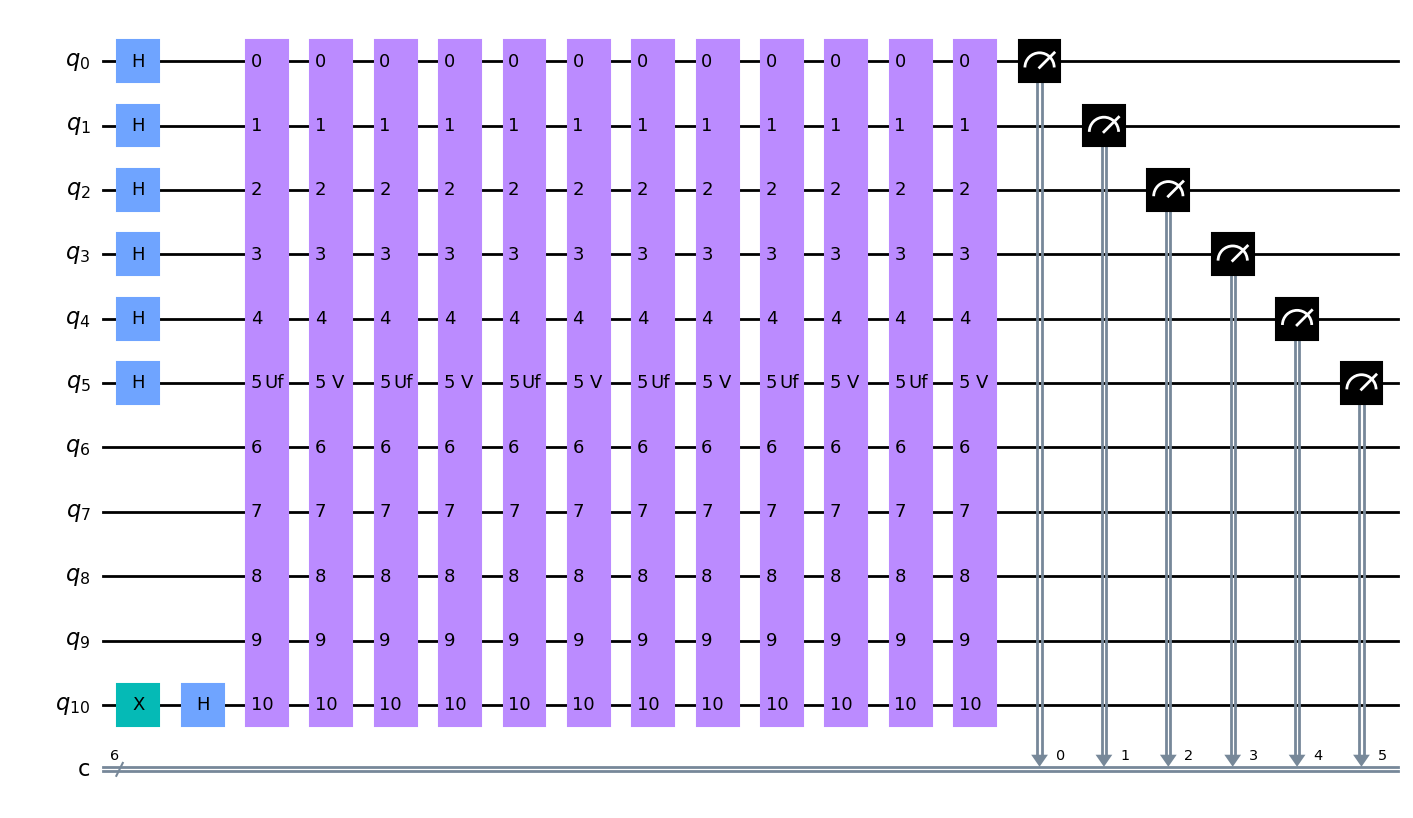

In [34]:
# We now create the Grover circuit

n = 6 # no. of working qubits (= no. of bits in "w")
q = 2 * n - 1 # no. of total qubits needed
gr_new = QuantumCircuit(q,n)
mu = 1 # number of solutions

r = int(np.floor(np.pi/4*np.sqrt(2**n/mu))) # Determine r (i.e. number of iterations to make)
# Since no. of working qubits = n, here N = 2^n
print('r = ', r)

# Step 1: apply Hadamard gates on all working qubits
gr_new.h(range(n))   

# Put ancilla qubit in state |->
gr_new.x(q-1)
gr_new.h(q-1)
    
# Step 2: apply r rounds of the phase oracle and the diffuser
for j in range(r):
    gr_new.append(gen_phase_oracle(q), range(q)) # range(q) tells the computer to add the oracle to gr in the same order of qubits, i.e. 0,1,2,...,q-1
    gr_new.append(gen_diffuser(q), range(q))
        
# Step 3: measure all qubits
gr_new.measure(range(n), range(n))
    
gr_new.draw()

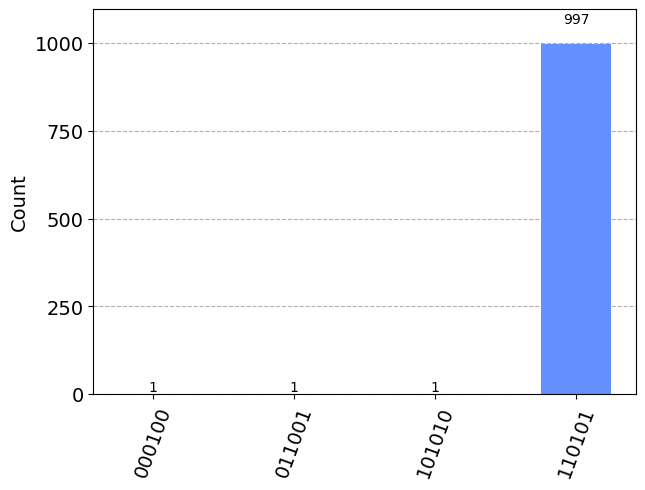

In [35]:
# Let's see the results

from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('aer_simulator')
job = execute(gr_new, backend=simulator, shots=1000)
counts = job.result().get_counts()

plot_histogram(counts)

In [37]:
# We found the solution "w" as expected